In [ ]:
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
from datetime import date,timedelta
import matplotlib.pyplot as plt



Read the Data from the Given excel file.

In [ ]:
train_data = pd.read_csv("/content/Consumer_Complaints_train.csv")
train_data.describe()

,Complaint ID
count,3.588100e+05
mean,1.043850e+06
std,5.945511e+05
min,5.000000e+00
25%,5.339312e+05
50%,1.064641e+06
75%,1.561380e+06
max,2.126221e+06


In [ ]:
train_data.shape

(358810, 18)

Check the data type for both data (test file and train file) 

In [ ]:
test_data = pd.read_csv("/content/Consumer_Complaints_test.csv")
train_data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [ ]:
test_data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

Do missing value analysis and drop columns where more than 25% of data are missing


In [ ]:
missing_data = train_data.isnull().sum()*100/len(train_data)
print(missing_data)

Date received                    0.000000
Product                          0.000000
Sub-product                     28.925058
Issue                            0.000000
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Company                          0.000000
State                            0.809063
ZIP code                         0.811293
Tags                            86.002062
Consumer consent provided?      71.689752
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64


In [ ]:
missing_datatest = test_data.isnull().sum()*100/len(test_data)
print(missing_datatest)

Date received                    0.000000
Product                          0.000000
Sub-product                     28.997709
Issue                            0.000000
Sub-issue                       61.242747
Consumer complaint narrative    84.186412
Company public response         81.221678
Company                          0.000000
State                            0.782569
ZIP code                         0.783406
Tags                            85.805896
Consumer consent provided?      71.651088
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Complaint ID                     0.000000
dtype: float64


In [ ]:
train_data.drop(['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)
test_data.drop(['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)

In [ ]:
train_data.head()


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
train_data["Date received"]= pd.to_datetime(train_data['Date received'])
train_data["Date sent to company"]= pd.to_datetime(train_data['Date sent to company'])
train_data["Day"]=train_data["Date received"].dt.day
train_data["Month"]=train_data["Date received"].dt.month
train_data["Year"]=train_data["Date received"].dt.year
# train_data.drop(["Date received"],inplace=True,axis=1)
train_data


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,14,4,2014
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,14,3,2013
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,1,2,2013
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,25,6,2015


 Extracting Day, Month, and Year from Date Received Column and create new fields for a month, year,
and day


In [ ]:
test_data["Date received"]= pd.to_datetime(test_data['Date received'])
test_data["Date sent to company"]= pd.to_datetime(test_data['Date sent to company'])
test_data["Day"]=test_data["Date received"].dt.day
test_data["Month"]=test_data["Date received"].dt.month
test_data["Year"]=test_data["Date received"].dt.year
# test_data.drop(["Date received"],inplace=True,axis=1)
test_data

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day,Month,Year
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,17,1,2015
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,22,6,2016
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,4,9,2015
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,17,5,2016
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,9,2,2015
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,13,11,2012
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,15,5,2012
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,7,6,2015


Calculate the number of days the complaint was with the company

create new field with help given logic
Like, Days held = Date sent to company - Date received

In [ ]:
train_data["days held"]=(train_data['Date sent to company']-train_data["Date received"]).dt.days
train_data["days held"]

0          0
1          0
2         14
3          1
4          0
          ..
358805    -1
358806     4
358807     0
358808     4
358809    22
Name: days held, Length: 358810, dtype: int64

In [ ]:
test_data["days held"]=(test_data['Date sent to company']-test_data["Date received"]).dt.days
test_data["days held"]

0         0
1         0
2         0
3         3
4         0
         ..
119601    0
119602    1
119603    0
119604    0
119605    0
Name: days held, Length: 119606, dtype: int64

In [ ]:
train_data["Weeks"]=(train_data["Date received"]).dt.week
train_data.head()

<ipython-input-23-139b2f2308ae>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data["Weeks"]=(train_data["Date received"]).dt.week


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year,days held,Weeks
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015,0,42
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015,0,17
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013,14,51
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016,1,9
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015,0,5


In [ ]:
test_data["Weeks"]=(test_data["Date received"]).dt.week
test_data.head()

<ipython-input-24-f72213ce0177>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_data["Weeks"]=(test_data["Date received"]).dt.week


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day,Month,Year,days held,Weeks
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,17,1,2015,0,3
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,22,6,2016,0,25
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,4,9,2015,0,36
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,17,5,2016,3,20
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016,0,27


Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [ ]:
train_data.drop(['Date received','Date sent to company',"ZIP code",'Complaint ID'],axis=1,inplace=True)
test_data.drop(['Date received','Date sent to company',"ZIP code",'Complaint ID'],axis=1,inplace=True)


In [ ]:
train_data

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,days held,Weeks
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,42
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,17
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,51
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,9
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,14,4,2014,-1,16
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,14,3,2013,4,11
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,1,2,2013,0,5
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,25,6,2015,4,26


In [ ]:
test_data

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,days held,Weeks
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,0,25
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,0,36
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,3,20
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,9,2,2015,0,7
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,13,11,2012,1,46
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,15,5,2012,0,20
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,7,6,2015,0,23


In [ ]:
# train_data['State']=train_data.fillna(train_data['State'].mode(),inplace=True)

In [ ]:
# train_data["Week recieved"]=train_data['days held']//7

Impute null values in "State" by Mode (find mode and replace nan value)

In [ ]:
train_data['State'].fillna(train_data['State'].mode()[0],inplace=True)

In [ ]:
train_data["State"].isnull().sum()

0

In [ ]:
test_data["State"].isnull().sum()

936

In [ ]:
test_data['State'].fillna(test_data['State'].mode()[0],inplace=True)

In [ ]:
test_data["State"].isnull().sum()

0

In [ ]:

train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,days held,Weeks
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,42
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,17
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,51
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,9
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,5


In [ ]:
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,days held,Weeks
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,0,25
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,0,36
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,3,20
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0,27


In [ ]:
train_data["disputed_cons"]=train_data["Consumer disputed?"]

In [ ]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,days held,Weeks,disputed_cons
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,42,No
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,17,Yes
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,51,No
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,9,No
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,5,Yes


In [ ]:
y=train_data["disputed_cons"].value_counts()
x=train_data["disputed_cons"]

In [ ]:
y

No     282638
Yes     76172
Name: disputed_cons, dtype: int64

Ploting various graphs

<Axes: xlabel='Consumer disputed?', ylabel='count'>

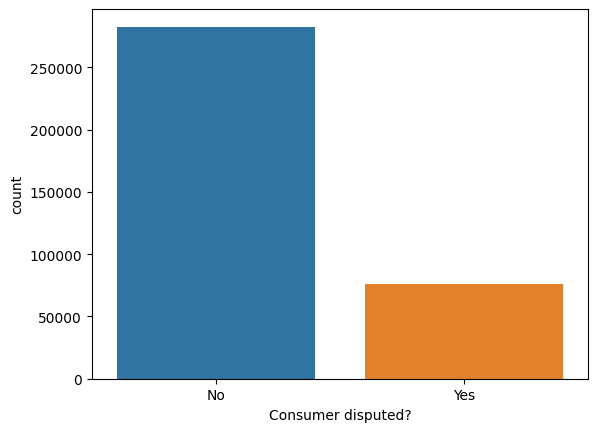

In [ ]:

# train_data["disputed_cons"].value_counts().plot(kind='bar')
# fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x="Consumer disputed?",data=train_data)

# plt.show()

<Axes: xlabel='Product', ylabel='count'>

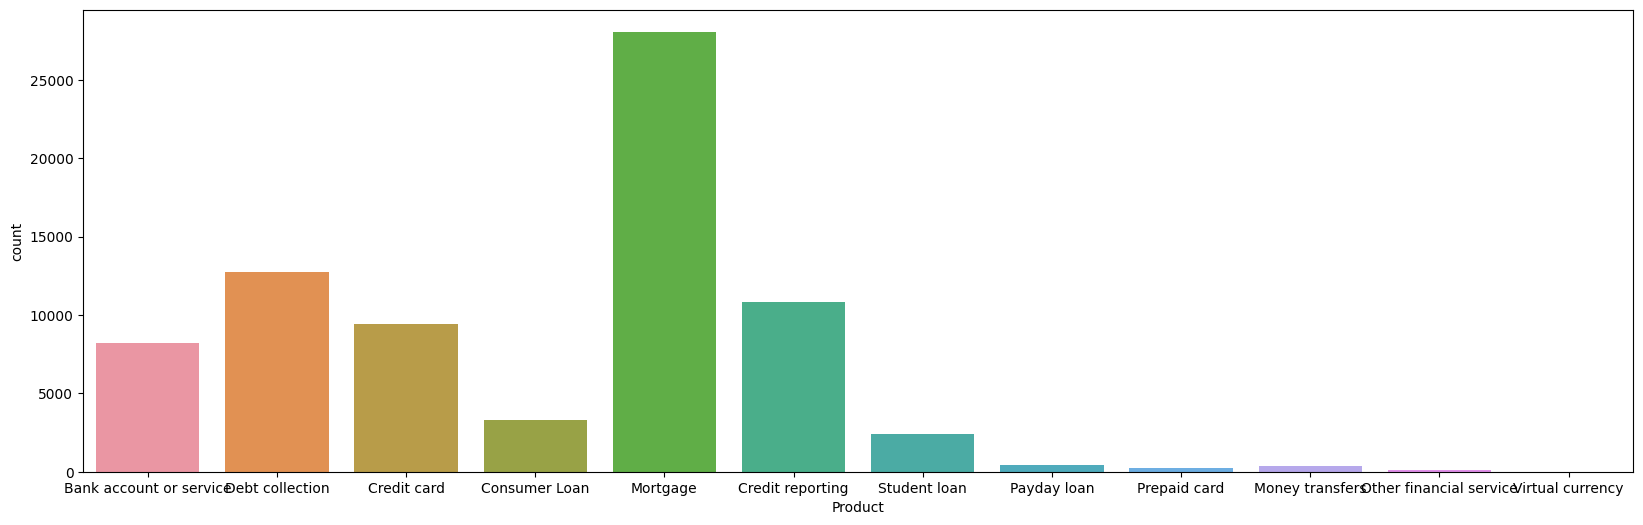

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['Product'].value_counts().plot(kind='bar')
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Product'],data=train_data)

In [ ]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,days held,Weeks,disputed_cons
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,42,No
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,17,Yes
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,51,No
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,9,No
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,5,Yes


<Axes: xlabel='Issue', ylabel='count'>

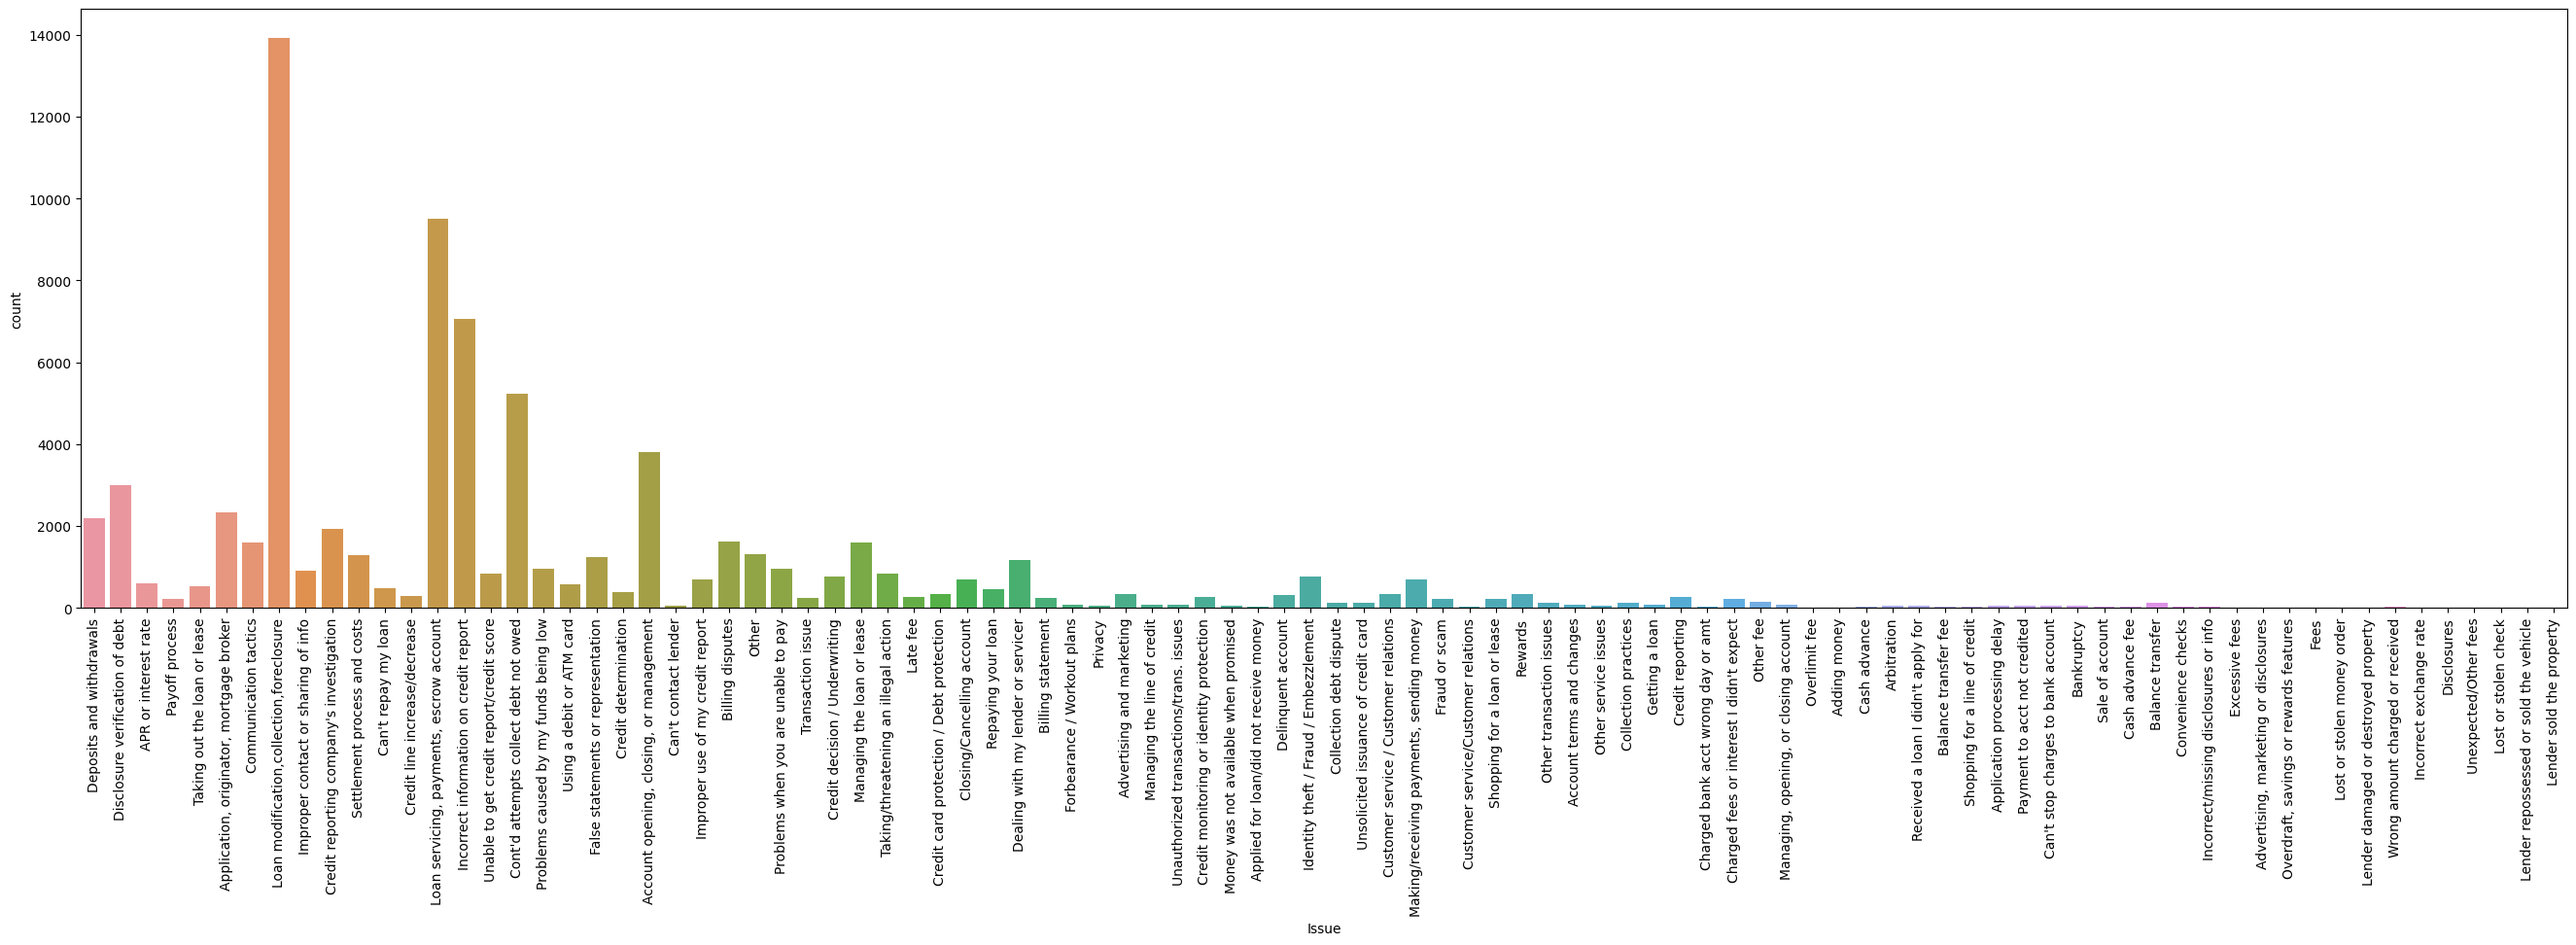

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['Issue'].value_counts().plot(kind='bar',figsize=(33,10))
fig,ax = plt.subplots(figsize=(33,8))
ax.tick_params(axis='x', rotation=90)
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Issue'],data=train_data)

<Axes: xlabel='State', ylabel='count'>

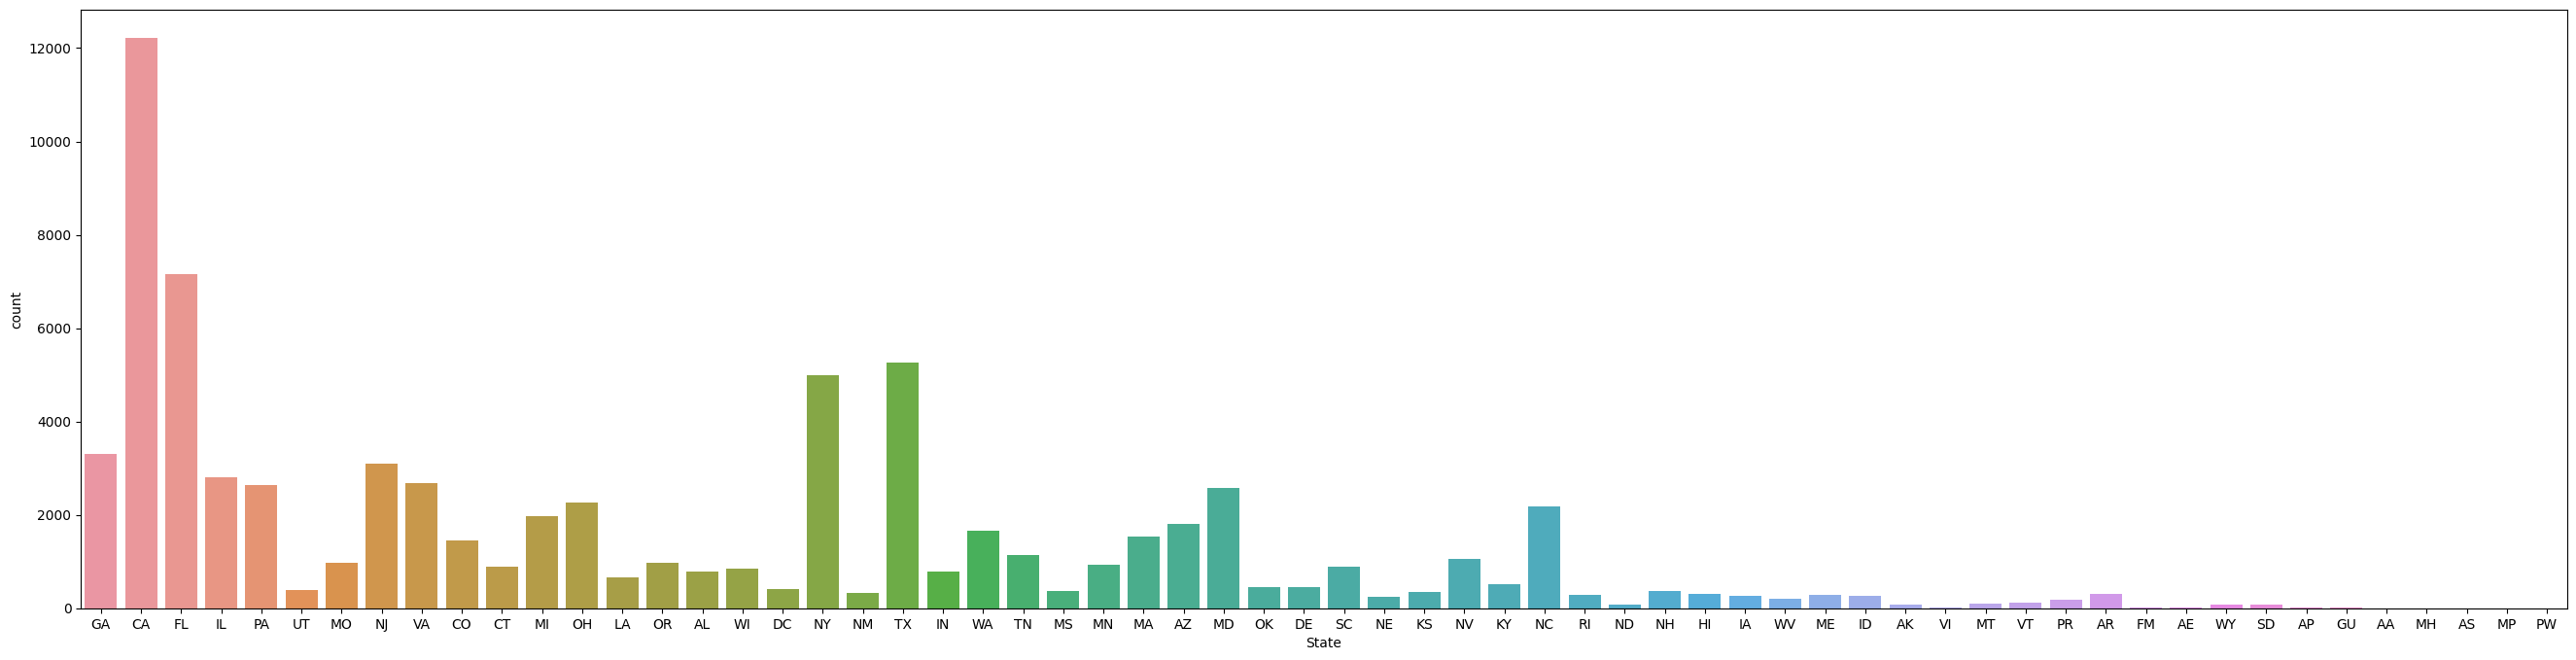

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['State'].value_counts().plot(kind='bar',figsize=(33,10))
fig,ax = plt.subplots(figsize=(33,8))
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['State'],data=train_data)

<Axes: xlabel='Timely response?', ylabel='count'>

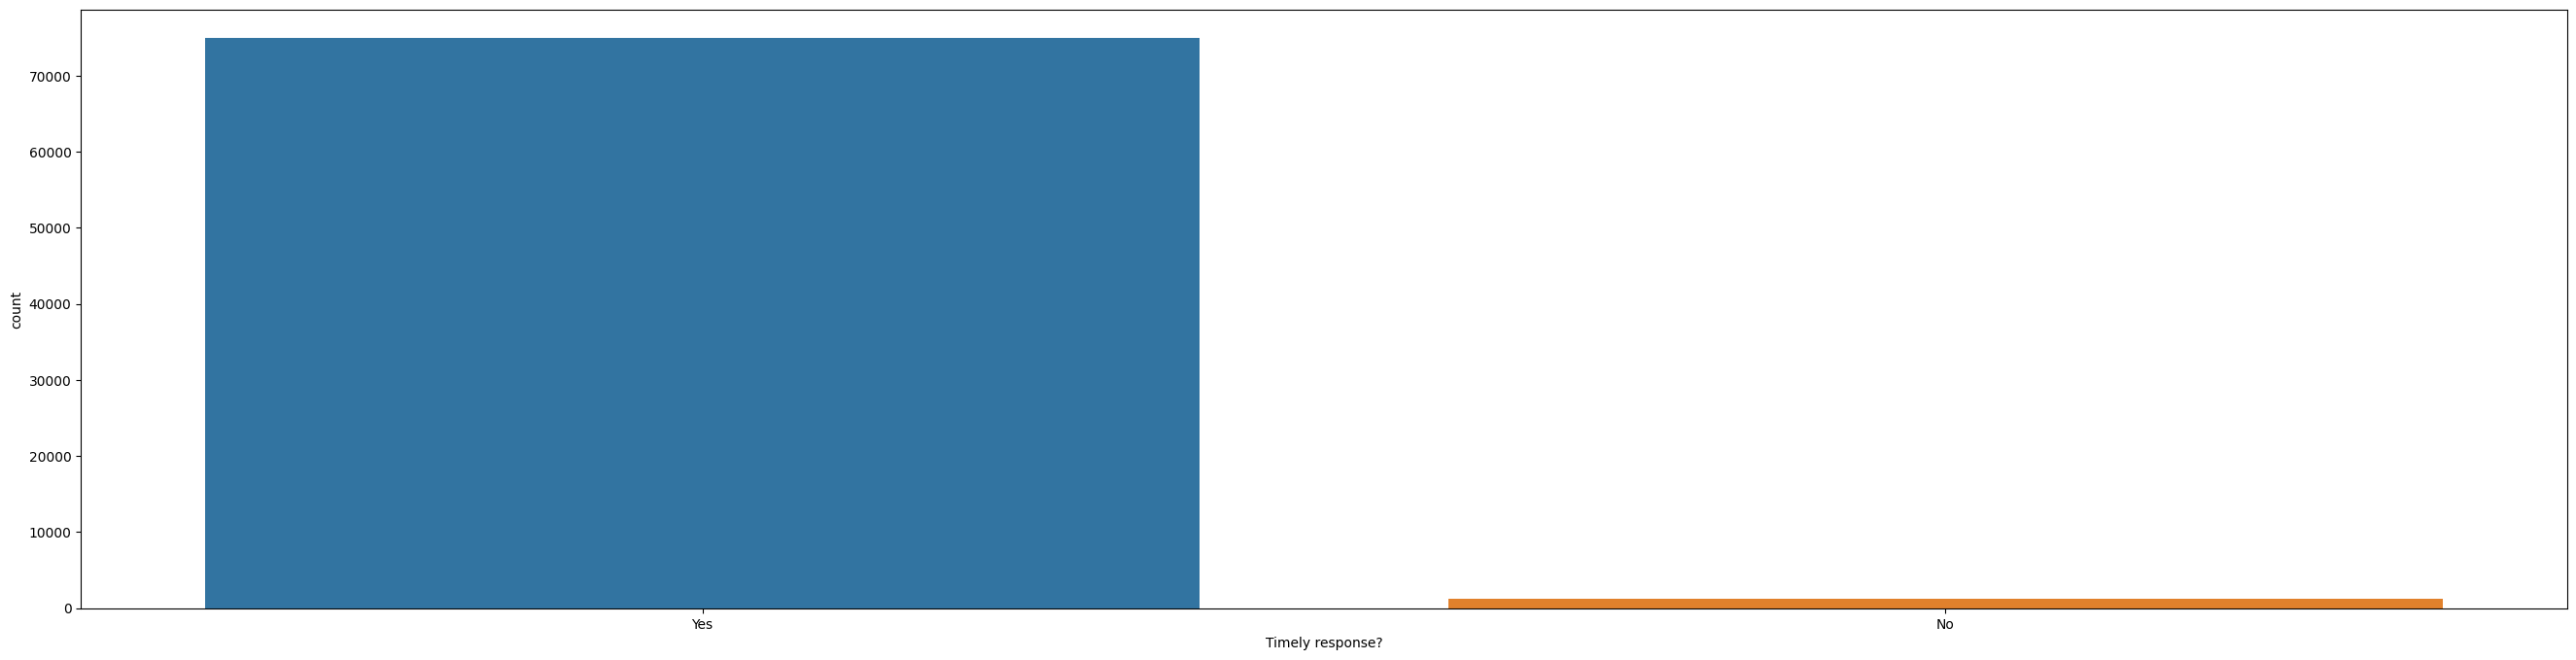

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['Submitted via'].value_counts().plot(kind='bar',figsize=(33,10))
fig,ax = plt.subplots(figsize=(33,8))
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Timely response?'],data=train_data)

<Axes: xlabel='Company response to consumer', ylabel='count'>

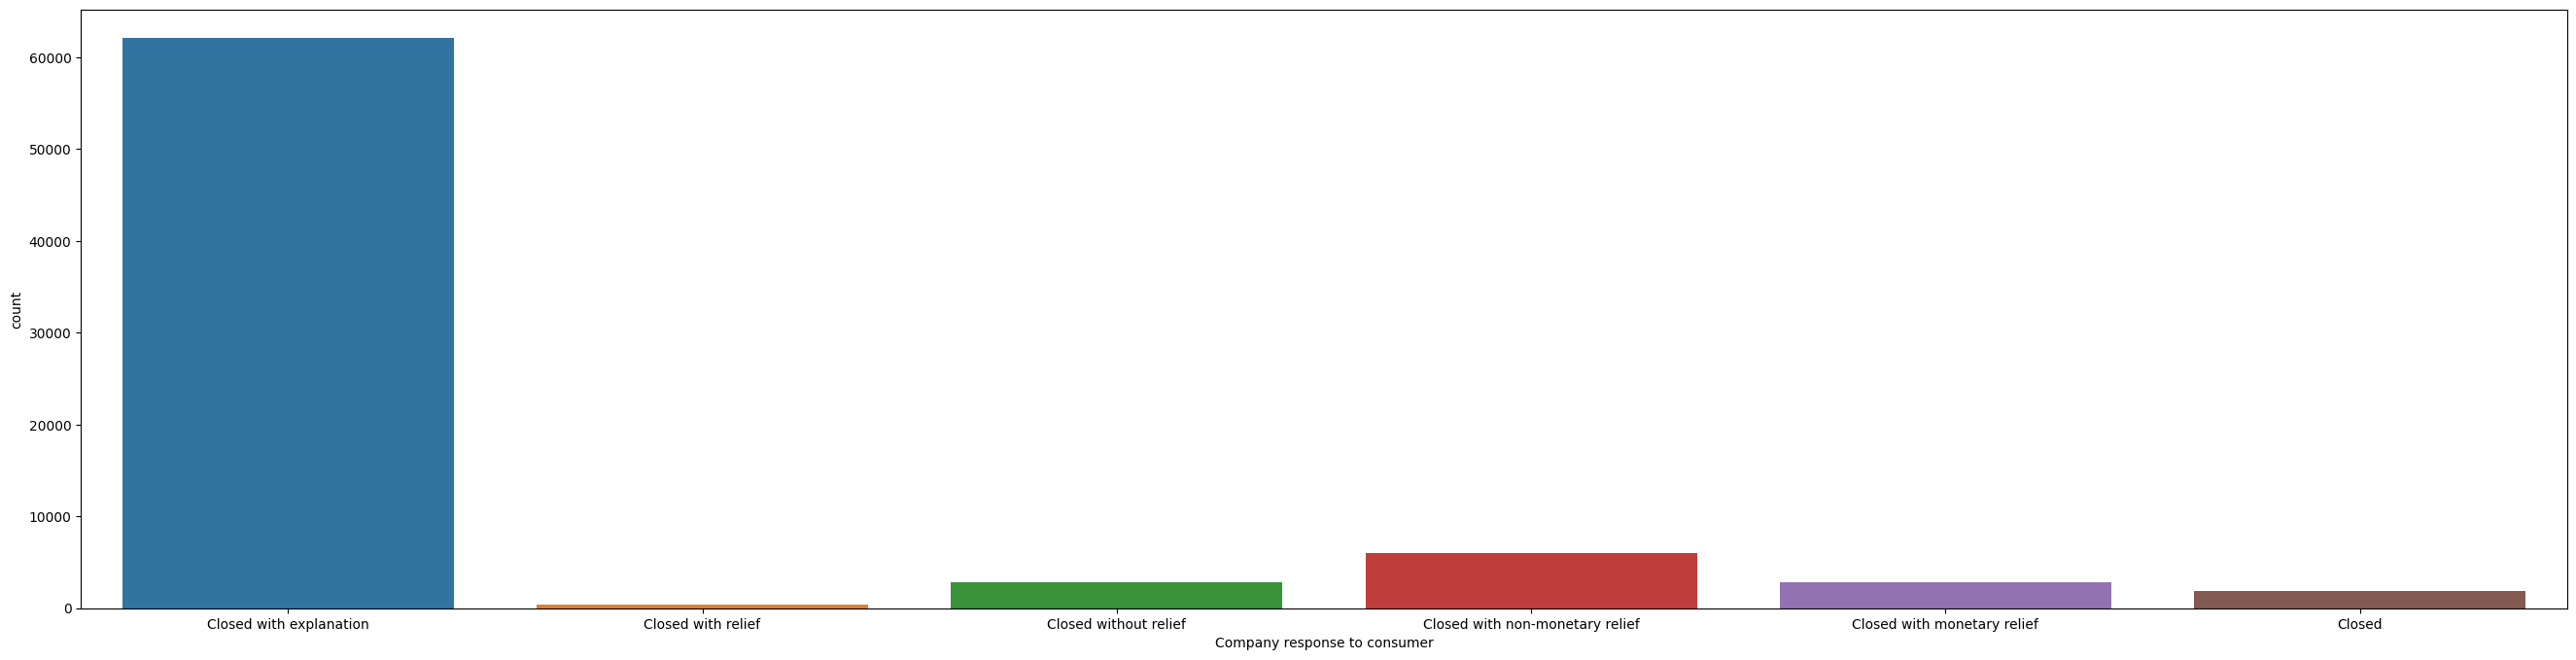

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['Company response to consumer'].value_counts().plot(kind='bar',figsize=(33,10)
fig,ax = plt.subplots(figsize=(33,8))
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Company response to consumer'],data=train_data)

<Axes: xlabel='Timely response?', ylabel='count'>

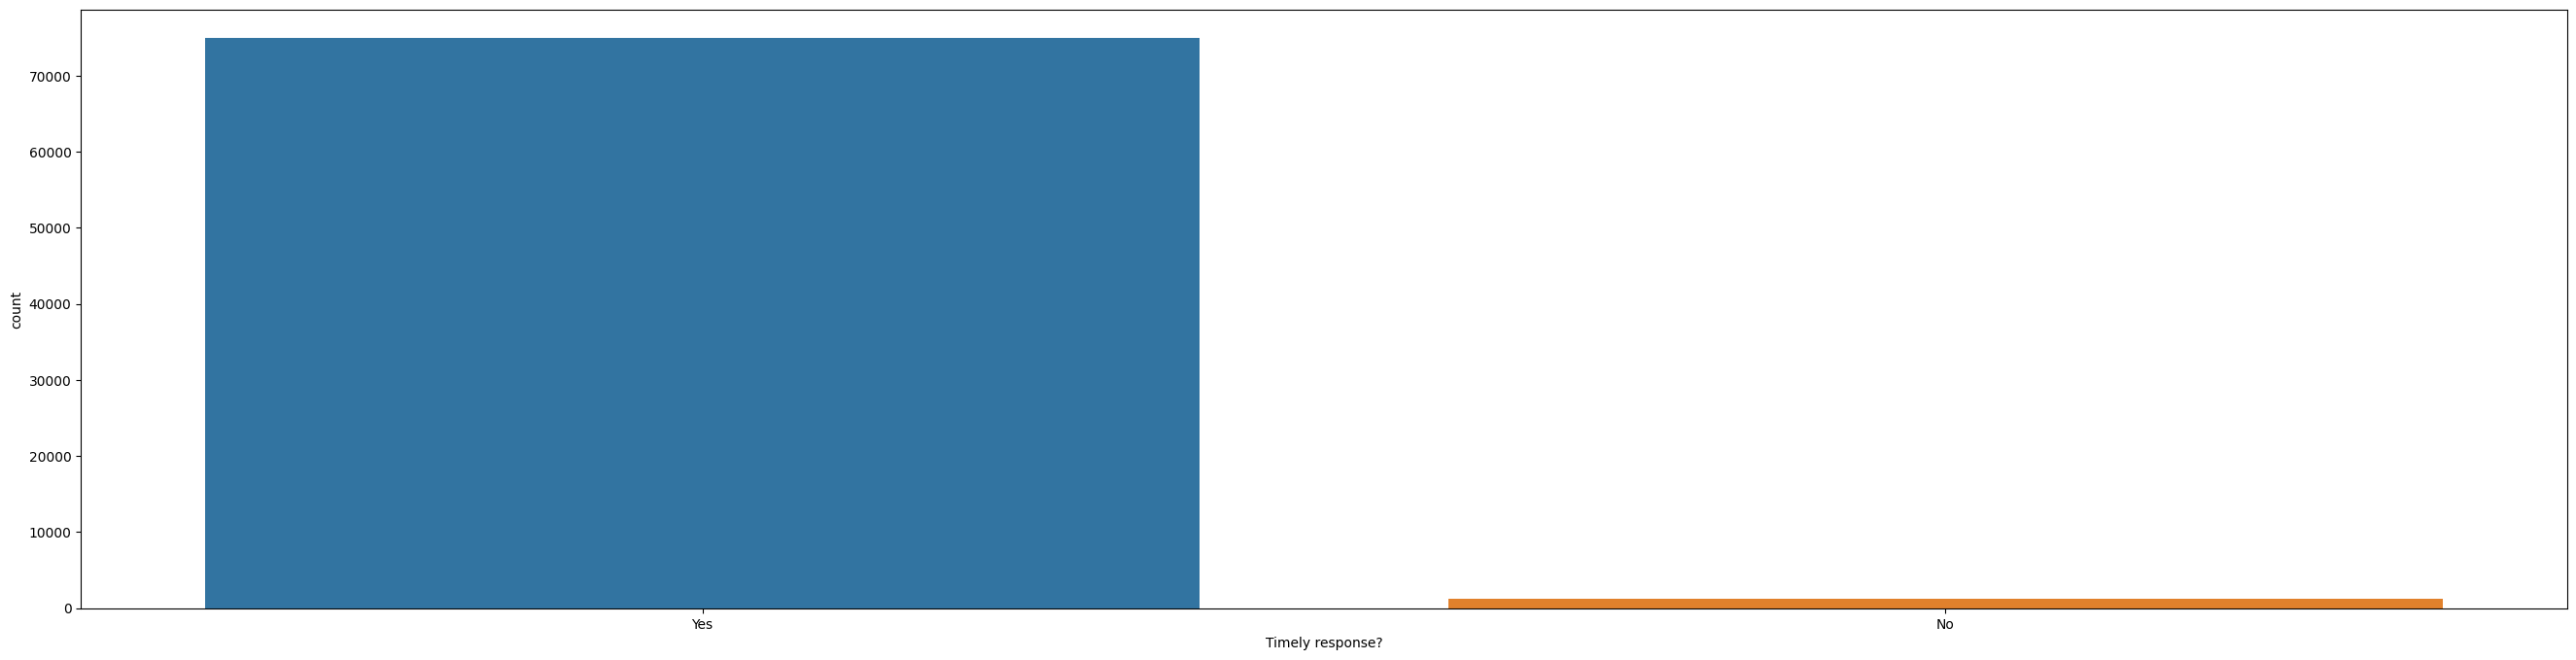

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['Timely response?'].value_counts().plot(kind='bar',figsize=(13,10))
fig,ax = plt.subplots(figsize=(33,8))
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Timely response?'],data=train_data)

<Axes: xlabel='Year', ylabel='count'>

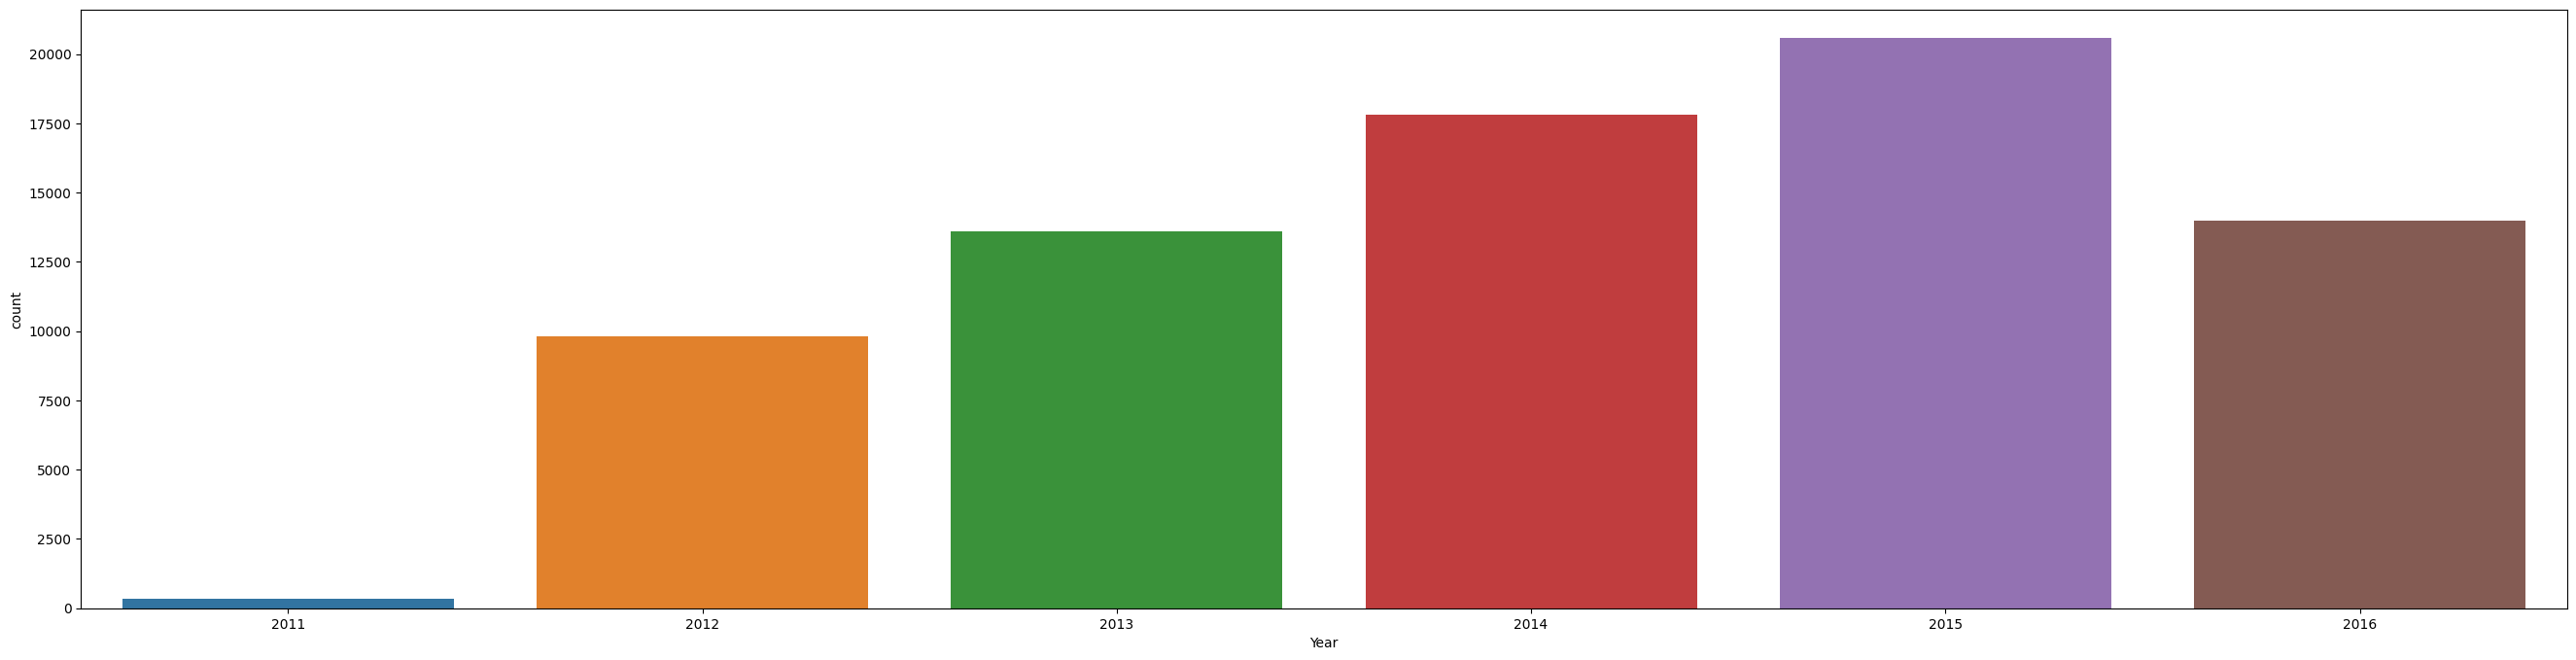

In [ ]:
# train_data[train_data['Consumer disputed?'] == 'Yes']['Year'].value_counts().plot(kind='bar',figsize=(13,10))
fig,ax = plt.subplots(figsize=(33,8))
sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Year'],data=train_data)

In [ ]:

# train_data[train_data['Consumer disputed?'] == 'Yes']['Company'].value_counts().plot(kind='bar',figsize=(33,10))
# fig,ax = plt.subplots(figsize=(33,18))
# ax.tick_params(axis='x', rotation=90)
# sns.countplot(x=train_data[train_data['Consumer disputed?'] == 'Yes']['Company'],data=train_data)

In [ ]:
train_data['days held'].describe

<bound method NDFrame.describe of 0          0
1          0
2         14
3          1
4          0
          ..
358805    -1
358806     4
358807     0
358808     4
358809    22
Name: days held, Length: 358810, dtype: int64>

Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [ ]:
train_data[train_data['days held']<0]=0

In [ ]:
train_data['days held'].describe()

count    358810.000000
mean          4.467863
std          16.738260
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: days held, dtype: float64

In [ ]:
test_data[test_data['days held']<0]=0

In [ ]:
test_data['days held'].describe()

count    119606.000000
mean          4.455178
std          16.229849
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: days held, dtype: float64

In [ ]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.tokenize import word_tokenize

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import wordpunct_tokenize
import string
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from nltk.tokenize import wordpunct_tokenize

In [ ]:
relevant_text_train = train_data['Issue']
relevant_text_test = test_data['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(str(x).lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(str(x).lower()))

def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))

stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)

filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)

def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))

def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))

def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [ ]:
test_data.Product

0              Credit card
1            Consumer Loan
2              Credit card
3            Consumer Loan
4          Debt collection
                ...       
119601         Credit card
119602         Credit card
119603            Mortgage
119604    Credit reporting
119605     Debt collection
Name: Product, Length: 119606, dtype: object

In [ ]:
print('Bank account or service' in train_data['Product'].unique())


True


In [ ]:
train_data['Issues_cleaned'] = clean_data_train
test_data['Issues_cleaned'] = clean_data_test
train_data= train_data.drop('Issue', axis = 1)
test_data = test_data.drop('Issue', axis = 1)

In [ ]:
train_data.head()

,Product,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,days held,Weeks,disputed_cons,Issues_cleaned
0,Credit reporting,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,42,No,incorrect inform on credit report
1,Bank account or service,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,17,Yes,deposit and withdraw
2,Credit card,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,51,No,other
3,Debt collection,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,9,No,disclosur verif of debt
4,Debt collection,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,5,Yes,disclosur verif of debt


In [ ]:
test_data.head()

,Product,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,days held,Weeks,Issues_cleaned
0,Credit card,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,0,3,custom servic custom relat
1,Consumer Loan,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,0,25,payment to acct not credit
2,Credit card,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,0,36,credit line increas decreas
3,Consumer Loan,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,3,20,problem when you be unabl to pay
4,Debt collection,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0,27,improp contact or share of info


In [ ]:
train_data = train_data.drop(['Company','State','Year'], axis = 1)
test_data = test_data.drop(['Company','State','Year'], axis = 1)

In [ ]:
test_data.columns

Index(['Product', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Day', 'Month', 'days held', 'Weeks',
       'Issues_cleaned'],
      dtype='object')

In [ ]:
test_data = test_data.drop(['days held'], axis = 1)
train_data=train_data.drop(['days held'], axis =1)

In [ ]:

train_data=train_data.drop(['disputed_cons'], axis =1)

In [ ]:
train_data.columns
train_data["Consumer disputed?"] = np.where(train_data["Consumer disputed?"]=="Yes",1,0)

In [ ]:
train_data.columns

Index(['Product', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Day', 'Month', 'Weeks',
       'Issues_cleaned'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Product', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Day', 'Month', 'Weeks', 'Issues_cleaned'],
      dtype='object')

In [ ]:
test_data.Product.unique()

array(['Credit card', 'Consumer Loan', 'Debt collection', 'Mortgage',
       'Credit reporting', 'Bank account or service',
       'Other financial service', 'Student loan', 'Payday loan', 0,
       'Prepaid card', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [ ]:
df_dummies=pd.get_dummies(train_data, prefix=['Product_dum', 'Submitted via_dum', 'Company response to consumer_dum', 'Timely response?_dum'], columns=['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'],drop_first=True)

In [ ]:
df_dummies= df_dummies.drop(['Consumer disputed?','Month','Day','Weeks','Issues_cleaned'],axis=1)
df_dummies.columns

Index(['Product_dum_Bank account or service', 'Product_dum_Consumer Loan',
       'Product_dum_Credit card', 'Product_dum_Credit reporting',
       'Product_dum_Debt collection', 'Product_dum_Money transfers',
       'Product_dum_Mortgage', 'Product_dum_Other financial service',
       'Product_dum_Payday loan', 'Product_dum_Prepaid card',
       'Product_dum_Student loan', 'Product_dum_Virtual currency',
       'Submitted via_dum_Email', 'Submitted via_dum_Fax',
       'Submitted via_dum_Phone', 'Submitted via_dum_Postal mail',
       'Submitted via_dum_Referral', 'Submitted via_dum_Web',
       'Company response to consumer_dum_Closed',
       'Company response to consumer_dum_Closed with explanation',
       'Company response to consumer_dum_Closed with monetary relief',
       'Company response to consumer_dum_Closed with non-monetary relief',
       'Company response to consumer_dum_Closed with relief',
       'Company response to consumer_dum_Closed without relief',
       'Timel

In [ ]:
df_dummies_test=pd.get_dummies(test_data, prefix=['Product_dum', 'Submitted via_dum', 'Company response to consumer_dum', 'Timely response?_dum'], columns=['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'],drop_first=True)

In [ ]:
df_dummies_test= df_dummies_test.drop(['Month','Day','Weeks','Issues_cleaned'],axis=1)
df_dummies_test

,Product_dum_Bank account or service,Product_dum_Consumer Loan,Product_dum_Credit card,Product_dum_Credit reporting,Product_dum_Debt collection,Product_dum_Money transfers,Product_dum_Mortgage,Product_dum_Other financial service,Product_dum_Payday loan,Product_dum_Prepaid card,...,Submitted via_dum_Referral,Submitted via_dum_Web,Company response to consumer_dum_Closed,Company response to consumer_dum_Closed with explanation,Company response to consumer_dum_Closed with monetary relief,Company response to consumer_dum_Closed with non-monetary relief,Company response to consumer_dum_Closed with relief,Company response to consumer_dum_Closed without relief,Timely response?_dum_No,Timely response?_dum_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
119602,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
119603,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
119604,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
train_data=pd.concat([train_data,df_dummies],axis=1)

In [ ]:
train_data['Issues_cleaned']

0           incorrect inform on credit report
1                        deposit and withdraw
2                                       other
3                     disclosur verif of debt
4                     disclosur verif of debt
                         ...                 
358805                                      0
358806          loan modif collect foreclosur
358807                         payoff process
358808    cont d attempt collect debt not owe
358809      incorrect inform on credit report
Name: Issues_cleaned, Length: 358810, dtype: object

In [ ]:
train_data=train_data.drop(['Product','Submitted via', 'Company response to consumer','Timely response?'],axis=1)

In [ ]:
test_data = pd.concat([test_data,df_dummies_test],axis=1)

In [ ]:
test_data['Issues_cleaned']

0                custom servic custom relat
1                payment to acct not credit
2               credit line increas decreas
3          problem when you be unabl to pay
4           improp contact or share of info
                        ...                
119601                      credit determin
119602                      balanc transfer
119603        loan modif collect foreclosur
119604    incorrect inform on credit report
119605                        commun tactic
Name: Issues_cleaned, Length: 119606, dtype: object

In [ ]:
test_data.drop(['Product','Submitted via','Company response to consumer','Timely response?'],axis=1,inplace=True)

In [ ]:
test_data

,Day,Month,Weeks,Issues_cleaned,Product_dum_Bank account or service,Product_dum_Consumer Loan,Product_dum_Credit card,Product_dum_Credit reporting,Product_dum_Debt collection,Product_dum_Money transfers,...,Submitted via_dum_Referral,Submitted via_dum_Web,Company response to consumer_dum_Closed,Company response to consumer_dum_Closed with explanation,Company response to consumer_dum_Closed with monetary relief,Company response to consumer_dum_Closed with non-monetary relief,Company response to consumer_dum_Closed with relief,Company response to consumer_dum_Closed without relief,Timely response?_dum_No,Timely response?_dum_Yes
0,17,1,3,custom servic custom relat,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,22,6,25,payment to acct not credit,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,4,9,36,credit line increas decreas,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,17,5,20,problem when you be unabl to pay,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,7,7,27,improp contact or share of info,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,9,2,7,credit determin,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
119602,13,11,46,balanc transfer,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
119603,15,5,20,loan modif collect foreclosur,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
119604,7,6,23,incorrect inform on credit report,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(train_data['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(test_data['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [ ]:
df_final_train = train_data.drop('Issues_cleaned', axis = 1)
df_final_test = test_data.drop('Issues_cleaned', axis = 1)
df_final_test = test_data
df_final_train = pd.concat([df_final_train, issues_train], axis = 1)
df_final_test = pd.concat([df_final_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_final_test['Feature168'] = Feature168

In [ ]:
df_final_train.head()

,Consumer disputed?,Day,Month,Weeks,Product_dum_Bank account or service,Product_dum_Consumer Loan,Product_dum_Credit card,Product_dum_Credit reporting,Product_dum_Debt collection,Product_dum_Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,14,10,42,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,26,4,17,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596226,0.0,0.0,0.0,0.0
2,0,20,12,51,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,3,9,0,0,0,0,1,0,...,0.0,0.0,0.551057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,30,1,5,0,0,0,0,1,0,...,0.0,0.0,0.551057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_final_train.head()

,Consumer disputed?,Day,Month,Weeks,Product_dum_Bank account or service,Product_dum_Consumer Loan,Product_dum_Credit card,Product_dum_Credit reporting,Product_dum_Debt collection,Product_dum_Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,14,10,42,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,26,4,17,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596226,0.0,0.0,0.0,0.0
2,0,20,12,51,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,3,9,0,0,0,0,1,0,...,0.0,0.0,0.551057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,30,1,5,0,0,0,0,1,0,...,0.0,0.0,0.551057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# df_final_train.head()
df_final_test.head()

,Day,Month,Weeks,Issues_cleaned,Product_dum_Bank account or service,Product_dum_Consumer Loan,Product_dum_Credit card,Product_dum_Credit reporting,Product_dum_Debt collection,Product_dum_Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,17,1,3,custom servic custom relat,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,22,6,25,payment to acct not credit,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,4,9,36,credit line increas decreas,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,17,5,20,problem when you be unabl to pay,0,1,0,0,0,0,...,0.0,0.0,0.406588,0.0,0.0,0.0,0.0,0.413184,0.0,0
4,7,7,27,improp contact or share of info,0,0,0,0,1,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [ ]:
df_final_test.drop(['Issues_cleaned'],axis=1,inplace=True)

In [ ]:
df_final_test.head()

,Day,Month,Weeks,Product_dum_Bank account or service,Product_dum_Consumer Loan,Product_dum_Credit card,Product_dum_Credit reporting,Product_dum_Debt collection,Product_dum_Money transfers,Product_dum_Mortgage,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,17,1,3,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,22,6,25,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,4,9,36,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,17,5,20,0,1,0,0,0,0,0,...,0.0,0.0,0.406588,0.0,0.0,0.0,0.0,0.413184,0.0,0
4,7,7,27,0,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [ ]:
df_final_test.columns

Index(['Day', 'Month', 'Weeks', 'Product_dum_Bank account or service',
       'Product_dum_Consumer Loan', 'Product_dum_Credit card',
       'Product_dum_Credit reporting', 'Product_dum_Debt collection',
       'Product_dum_Money transfers', 'Product_dum_Mortgage',
       ...
       'Feature159', 'Feature160', 'Feature161', 'Feature162', 'Feature163',
       'Feature164', 'Feature165', 'Feature166', 'Feature167', 'Feature168'],
      dtype='object', length=197)

In [ ]:
df_final_train.columns

Index(['Consumer disputed?', 'Day', 'Month', 'Weeks',
       'Product_dum_Bank account or service', 'Product_dum_Consumer Loan',
       'Product_dum_Credit card', 'Product_dum_Credit reporting',
       'Product_dum_Debt collection', 'Product_dum_Money transfers',
       ...
       'Feature159', 'Feature160', 'Feature161', 'Feature162', 'Feature163',
       'Feature164', 'Feature165', 'Feature166', 'Feature167', 'Feature168'],
      dtype='object', length=198)

In [ ]:
df_final_train.shape

(358810, 198)

In [ ]:
y = df_final_train['Consumer disputed?']

In [ ]:
y = pd.read_csv('/content/Consumer_Complaints_train.csv')
y = y.drop(y[['Complaint ID','Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue','Consumer complaint narrative', 'Company public response', 'Company','State', 'ZIP code', 'Tags', 'Consumer consent provided?','Submitted via', 'Date sent to company', 'Company response to consumer','Timely response?', 'Complaint ID']], axis = 1)
y['Consumer disputed?'] = np.where(y['Consumer disputed?'] == "No", 0, 1)


In [ ]:
y.shape

(358810, 1)

In [ ]:
df_final_test.shape

(119606, 197)

In [ ]:
train_final = df_final_train

In [ ]:
train_final.drop(['Consumer disputed?'],axis=1,inplace=True)

Model building Build given models and mesure their test and validation accuracy build given models:

LogisticRegression

DecisionTreeClassifier

RandomForestClassifier

AdaBoostClassifier

GradientBoostingClassifier

KNeighborsClassifier

XGBClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss = StandardScaler()
X= pd.DataFrame(ss.fit_transform(train_final), columns = train_final.columns)
y= pd.DataFrame(ss.fit_transform(y), columns = y.columns)

pca = PCA(n_components=0.8, whiten=True)
X=pca.fit_transform(X)
y=pca.fit_transform(y)
pca.explained_variance_ratio_

array([1.])

In [ ]:
final_test = pd.DataFrame(ss.fit_transform(df_final_test), columns = df_final_test.columns)
final_test=pca.fit_transform(final_test)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
# scaledx = scale.fit_transform(df_final_train)
# scaledy = scale.fit_transform(df_final_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
y = lab.fit_transform(y)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32, shuffle=True)

logr = LogisticRegression(random_state = 41,class_weight = 'balanced')
logr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=41)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pred = logr.predict(X_test)
score = accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.84      0.52      0.64     70909
           2       0.25      0.60      0.36     18794

    accuracy                           0.53     89703
   macro avg       0.36      0.37      0.33     89703
weighted avg       0.72      0.53      0.58     89703



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(score)

0.5334827151823239


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dect = DecisionTreeClassifier()
  
    # Performing training
dect.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred = dect.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.80      0.93      0.86     70909
           2       0.27      0.11      0.15     18794

    accuracy                           0.75     89703
   macro avg       0.53      0.52      0.50     89703
weighted avg       0.69      0.75      0.71     89703



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100) 
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.80      0.93      0.86     70909
           2       0.29      0.11      0.16     18794

    accuracy                           0.76     89703
   macro avg       0.54      0.52      0.51     89703
weighted avg       0.69      0.76      0.71     89703



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, random_state=32)
abc.fit(X_train, y_train)
predr = abc.predict(X_test)
print(classification_report(y_test,predr))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88     70909
           2       0.00      0.00      0.00     18794

    accuracy                           0.79     89703
   macro avg       0.40      0.50      0.44     89703
weighted avg       0.62      0.79      0.70     89703



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier( learning_rate=0.1, n_estimators=50, random_state = 32)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=32)

In [ ]:
predg = gbc.predict(X_test)
print(classification_report(y_test,predg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      1.00      0.88     70909
           2       0.00      0.00      0.00     18794

    accuracy                           0.79     89703
   macro avg       0.26      0.33      0.29     89703
weighted avg       0.62      0.79      0.70     89703



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
predk = knc.predict(X_test)
print(classification_report(y_test,predk))

              precision    recall  f1-score   support

           1       0.80      0.93      0.86     70909
           2       0.28      0.11      0.16     18794

    accuracy                           0.75     89703
   macro avg       0.54      0.52      0.51     89703
weighted avg       0.69      0.75      0.71     89703



In [ ]:
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV

xgbc = xgb.XGBClassifier()
# xgbcc=CalibratedClassifierCV(xgbc, method='isotonic')
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
predxgb = xgbc.predict(X_test)
print(classification_report(y_test,predxgb))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88     70909
           2       0.47      0.00      0.01     18794

    accuracy                           0.79     89703
   macro avg       0.63      0.50      0.45     89703
weighted avg       0.72      0.79      0.70     89703



Final Model and Prediction for test data file

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(precision_score(y_test,predxgb))

0.7903526080510128
[[70812    97]
 [18709    85]]
0.7910099306308017


In [ ]:
res = xgbc.predict(final_test)

In [ ]:
print(res)

[1 1 2 ... 1 1 1]


In [ ]:
res = pd.DataFrame(res)

In [ ]:
res.value_counts()

1    112951
2      6655
dtype: int64

In [ ]:
res = np.where(res == 1, 'NO', 'YES')

Export Predictions to CSV

In [ ]:
output=pd.read_csv("/content/Consumer_Complaints_test.csv")

In [ ]:
output = output.assign(Consumer_Disputed = res)

In [ ]:
output=output.iloc[:,[1,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

In [ ]:
output

,Consumer_Disputed,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,NO,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,NO,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,YES,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,YES,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,NO,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,NO,2015-02-09,Credit card,NaN,Credit determination,NaN,NaN,NaN,Citibank,IL,60803,NaN,NaN,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,NO,2012-11-13,Credit card,NaN,Balance transfer,NaN,NaN,NaN,Capital One,KS,67114,NaN,NaN,Web,2012-11-14,Closed with explanation,Yes,189749
119603,NO,2012-05-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Referral,2012-05-15,Closed without relief,Yes,78574
119604,NO,2015-06-07,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"In XX/XX/XXXX, a Collection firm by the name o...",Company chooses not to provide a public response,Experian,OH,436XX,NaN,Consent provided,Web,2015-06-07,Closed with explanation,Yes,1409765


In [ ]:
res1 = rfc.predict(final_test)

In [ ]:
res1 = np.where(res1 == 1, 'NO', 'YES')

In [ ]:
output1=pd.read_csv("/content/Consumer_Complaints_test.csv")

In [ ]:
output1 = output1.assign(Consumer_Disputed = res1)

In [ ]:
output1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer_Disputed
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133,YES
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989,NO
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090,NO
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,YES
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667,NO


In [ ]:
output1=output1.iloc[:,[17,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

In [ ]:
output1

,Consumer_Disputed,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,YES,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,NO,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,NO,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,YES,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,NO,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,YES,2015-02-09,Credit card,NaN,Credit determination,NaN,NaN,NaN,Citibank,IL,60803,NaN,NaN,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,NO,2012-11-13,Credit card,NaN,Balance transfer,NaN,NaN,NaN,Capital One,KS,67114,NaN,NaN,Web,2012-11-14,Closed with explanation,Yes,189749
119603,NO,2012-05-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Referral,2012-05-15,Closed without relief,Yes,78574
119604,NO,2015-06-07,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"In XX/XX/XXXX, a Collection firm by the name o...",Company chooses not to provide a public response,Experian,OH,436XX,NaN,Consent provided,Web,2015-06-07,Closed with explanation,Yes,1409765
